# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [5]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

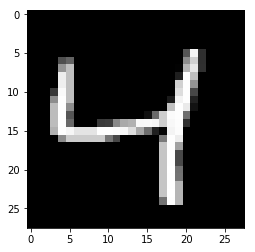

In [7]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [15]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
                        
# Input and target placeholders
inputs_ = tf.placeholder(tf.float64, (None, image_size))
targets_ = tf.placeholder(tf.float64, (None, image_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [16]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [17]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6948
Epoch: 1/20... Training loss: 0.6921
Epoch: 1/20... Training loss: 0.6897
Epoch: 1/20... Training loss: 0.6869
Epoch: 1/20... Training loss: 0.6837
Epoch: 1/20... Training loss: 0.6798
Epoch: 1/20... Training loss: 0.6743
Epoch: 1/20... Training loss: 0.6681
Epoch: 1/20... Training loss: 0.6611
Epoch: 1/20... Training loss: 0.6519
Epoch: 1/20... Training loss: 0.6421
Epoch: 1/20... Training loss: 0.6289
Epoch: 1/20... Training loss: 0.6183
Epoch: 1/20... Training loss: 0.6048
Epoch: 1/20... Training loss: 0.5859
Epoch: 1/20... Training loss: 0.5725
Epoch: 1/20... Training loss: 0.5502
Epoch: 1/20... Training loss: 0.5337
Epoch: 1/20... Training loss: 0.5143
Epoch: 1/20... Training loss: 0.4968
Epoch: 1/20... Training loss: 0.4763
Epoch: 1/20... Training loss: 0.4595
Epoch: 1/20... Training loss: 0.4442
Epoch: 1/20... Training loss: 0.4221
Epoch: 1/20... Training loss: 0.4128
Epoch: 1/20... Training loss: 0.3953
Epoch: 1/20... Training loss: 0.3762
E

Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1971
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1946
Epoch: 1/20... Training loss: 0.2025
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1849
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1891
Epoch: 1/20... Training loss: 0.1889
E

Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1682
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1630
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1481
E

Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1423
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1404
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1354
E

Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1321
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1234
E

Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1173
E

Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1146
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1094
E

Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1031
E

Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1082
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1081
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1069
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1051
E

Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0994
E

Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1050
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0985
E

Epoch: 9/20... Training loss: 0.1021
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.1018
Epoch: 9/20... Training loss: 0.0979
E

Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0904
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.1028
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0908
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0994
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0897
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20... Training loss: 0.0905
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0981
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

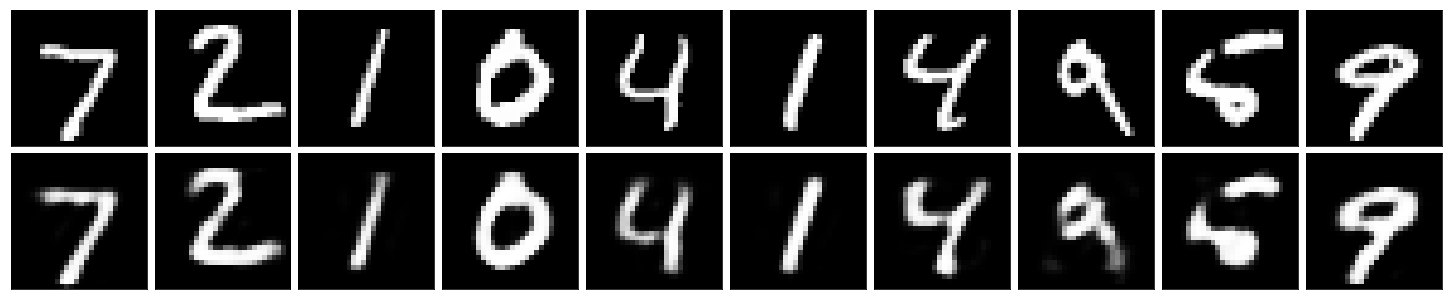

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [19]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.